In [6]:
import matplotlib.pylab as plt
from scipy.io.wavfile import read

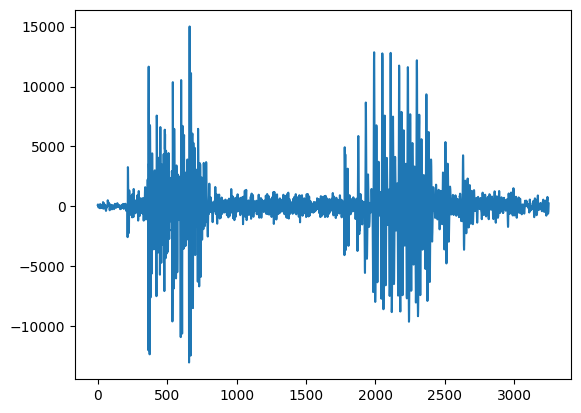

In [24]:
fs, amplitude = read("../cookbook/Chapter07/input_freq.wav")
plt.figure()
plt.plot(amplitude)
plt.show()

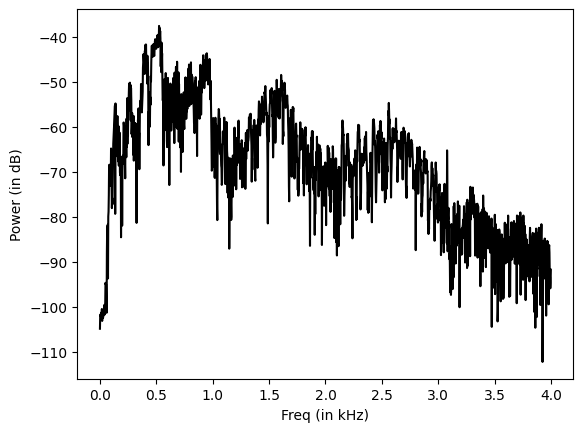

In [37]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Read the input file
sampling_freq, audio = wavfile.read('../cookbook/Chapter07/input_freq.wav')

# Normalize the values
audio = audio / (2.**15)

# Extract length
len_audio = len(audio)

# Apply Fourier transform
transformed_signal = np.fft.fft(audio)
half_length = np.ceil((len_audio + 1) / 2.0)
transformed_signal = abs(transformed_signal[0:int(half_length)])
transformed_signal /= float(len_audio)
transformed_signal **= 2

# Extract length of transformed signal
len_ts = len(transformed_signal)

# Take care of even/odd cases
if len_audio % 2:
    transformed_signal[1:len_ts] *= 2
else:
    transformed_signal[1:len_ts-1] *= 2

# Extract power in dB
power = 10 * np.log10(transformed_signal)

# Build the time axis
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000.0

# Plot the figure
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()

